In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam , SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

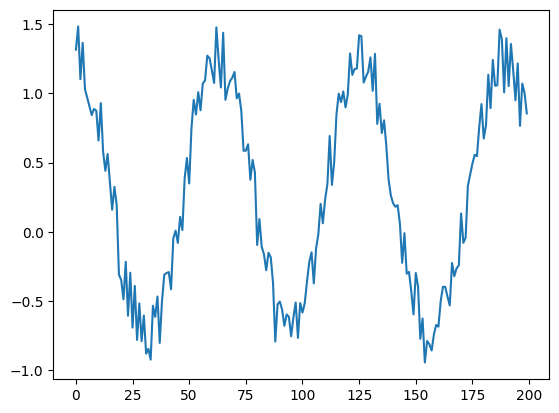

In [3]:
series = np.cos(0.1*np.arange(200))+ np.random.random(200)*0.5

plt.plot(series)
plt.show()

In [4]:
T = 10
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X)
X = X.reshape(-1, T)
Y = np.array(Y)
N = len(X)

In [5]:
i = tf.keras.layers.Input(shape=(T,))
x = tf.keras.layers.Dense(1)(i)
model = tf.keras.models.Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1)
)

In [6]:
r = model.fit(
    X[:N//2], Y[:N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - loss: 1.0389 - val_loss: 0.4978
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5681 - val_loss: 0.3300
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2841 - val_loss: 0.3223
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2713 - val_loss: 0.4131
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2574 - val_loss: 0.0767
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0852 - val_loss: 0.1833
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1572 - val_loss: 0.0879
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0578 - val_loss: 0.0829
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0878 - val_loss: 0.1037
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0875 - val_loss: 0.0704
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0702 - val_loss: 0.0979
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0709 - val_loss: 0.0585


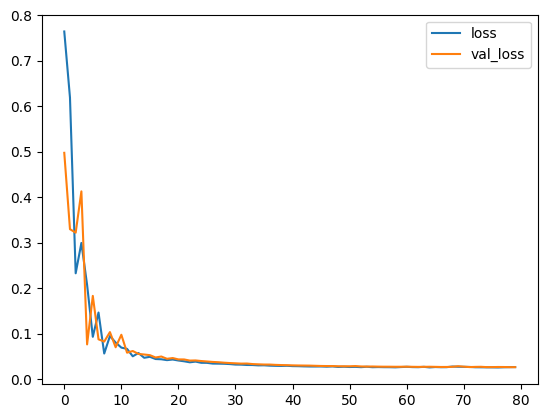

In [7]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [8]:
validation_target = Y[-N//2:]
validation_prediction = []

last_x = X[-N//2]

while len(validation_target) > len(validation_prediction):
  p = model.predict(last_x.reshape(1, -1))[0,0]

  validation_prediction.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

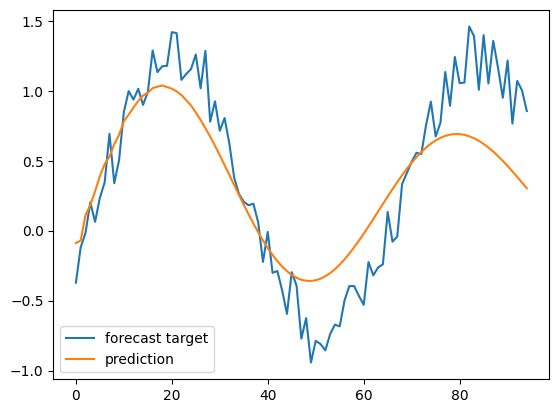

In [9]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_prediction, label='prediction')
plt.legend()

In [16]:
X[1]

array([1.48289726, 1.10241192, 1.36503186, 1.03090883, 0.96802356,
       0.90216315, 0.84341286, 0.88772384, 0.87530144, 0.65968876])

In [17]:
X[2]

array([1.10241192, 1.36503186, 1.03090883, 0.96802356, 0.90216315,
       0.84341286, 0.88772384, 0.87530144, 0.65968876, 0.92954748])

In [18]:
last_x

array([0.62011552, 0.5942269 , 0.56508946, 0.53307676, 0.49856788,
       0.46197635, 0.42371663, 0.3842254 , 0.34393275, 0.30327982])